In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/KNN ALGO Classified/datasets_45554_83164_Classified Data", index_col=0)

In [ ]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
data.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
X=data.iloc[0:,0:10]

In [ ]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [ ]:
Y=data["TARGET CLASS"]

In [ ]:
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [ ]:
X.shape, Y.shape

((1000, 10), (1000,))

In [ ]:
count_classes=pd.value_counts(data["TARGET CLASS"])
count_classes

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [ ]:
data["TARGET CLASS"].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

([<matplotlib.axis.XTick at 0x7f77125f0b00>,
 [Text(0, 0, 'Yes'), Text(0, 0, 'No')])

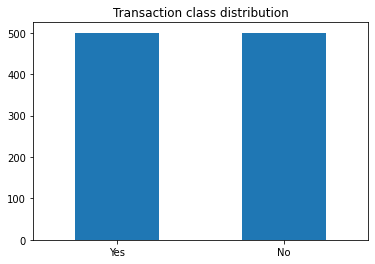

In [ ]:
count_classes.plot(kind="bar", rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2),labels=["Yes","No"])
#check balance data

In [ ]:
X.shape, Y.shape

((1000, 10), (1000,))

In [ ]:
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
X_scaled=stc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X_scaled,Y, random_state=15, test_size=0.25)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((750, 10), (250, 10), (750,), (250,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
pred=knn.predict(X_test)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
knn.score(X_test, Y_test)

0.928

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cmt=confusion_matrix(Y_test, pred)

In [ ]:
cmt

array([[100,   9],
       [  9, 132]])

In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       109
           1       0.94      0.94      0.94       141

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [ ]:
err_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  pred_i=knn.predict(X_test)
  err_rate.append(np.mean(pred_i != Y_test))

In [ ]:
err_rate

[0.072,
 0.08,
 0.06,
 0.072,
 0.084,
 0.076,
 0.076,
 0.076,
 0.06,
 0.064,
 0.06,
 0.064,
 0.056,
 0.056,
 0.056,
 0.064,
 0.056,
 0.052,
 0.052,
 0.052,
 0.052,
 0.056,
 0.04,
 0.048,
 0.052,
 0.048,
 0.056,
 0.056,
 0.056,
 0.056,
 0.056,
 0.06,
 0.052,
 0.056,
 0.06,
 0.056,
 0.056,
 0.056,
 0.06]

Text(0.5, 1.0, 'Error Rate')

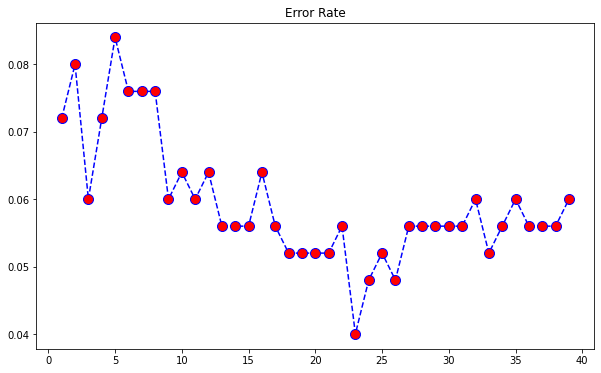

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title("Error Rate")


In [ ]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,Y_train)
pred_23=knn.predict(X_test)

In [ ]:
knn.score(X_test,Y_test)

0.96

In [ ]:
cmt=confusion_matrix(Y_test, pred_23)
cmt

array([[102,   7],
       [  3, 138]])

In [ ]:
print(classification_report(Y_test,pred_23))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       109
           1       0.95      0.98      0.97       141

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [ ]:
from collections import Counter
print("Y_test: {}".format(Counter(Y_test)))
print("Y_test: {}".format(Counter(pred_23)))

Y_test: Counter({1: 141, 0: 109})
Y_test: Counter({1: 145, 0: 105})
